In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Check that the sum of squares of N(0,1) follows a chi-square distribution

In [2]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [3]:
sample = np.random.normal(0, 1, m*n).reshape(m,n)
sample2 = sample*sample

count    5000.000000
mean        6.980253
std         3.678910
min         0.488873
25%         4.311220
50%         6.390834
75%         8.933750
max        29.666864
dtype: float64

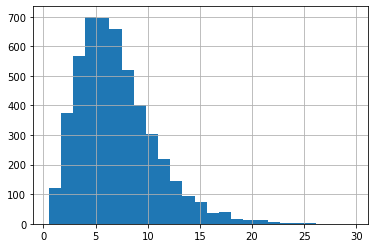

In [4]:
sums = sample2.sum(axis=1)
pd.Series(sums).hist(bins=25)
pd.Series(sums).describe()

count    5000.000000
mean        6.956533
std         3.726206
min         0.269437
25%         4.276310
50%         6.325663
75%         8.927043
max        30.651807
dtype: float64

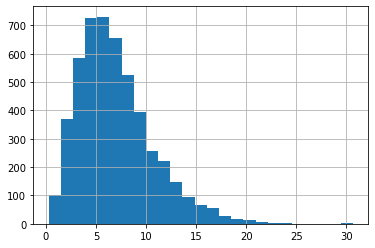

In [5]:
sample3 = np.random.chisquare(n,m)
pd.Series(sample3).hist(bins=25)
pd.Series(sample3).describe()

count    5000.000000
mean        0.023720
std         5.203166
min       -28.315217
25%        -3.220793
50%         0.029981
75%         3.195283
max        25.037569
dtype: float64
Difference is centered in 0 and errors follow a normal curve


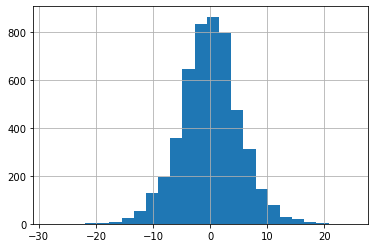

In [6]:
# Comprobation
diff = sums - sample3
pd.Series(diff).hist(bins=25)
print(pd.Series(diff).describe())
print("Difference is centered in 0 and errors follow a normal curve")

### Check that from the ratio of a z distribution and the root of a chi-square distribution we obtain a t distribution

In [7]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [8]:
samplez = np.random.normal(0, 1, m)
samplechi2 = np.random.chisquare(n,m)
samplechi2n = np.sqrt(np.random.chisquare(n,m)/n)
t = samplez / samplechi2n

count    5000.000000
mean        0.002917
std         1.167549
min        -7.445596
25%        -0.690733
50%        -0.000205
75%         0.700549
max         5.431000
dtype: float64

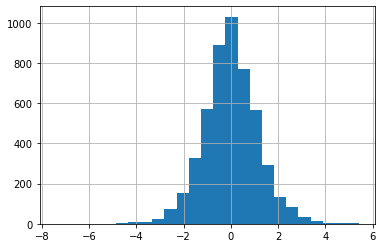

In [9]:
pd.Series(t).hist(bins=25)
pd.Series(t).describe()

In [10]:
samplet = np.random.standard_t(n, m)

count    5000.000000
mean        0.044424
std         1.195055
min        -5.201067
25%        -0.686807
50%         0.000150
75%         0.734967
max         7.011180
dtype: float64

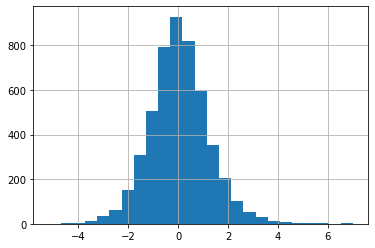

In [11]:
pd.Series(samplet).hist(bins=25)
pd.Series(samplet).describe()

count    5000.000000
mean       -0.041507
std         1.675811
min        -9.958773
25%        -1.086008
50%        -0.022847
75%         0.993380
max         6.913489
dtype: float64
Difference is centered in 0 and errors follow a normal curve


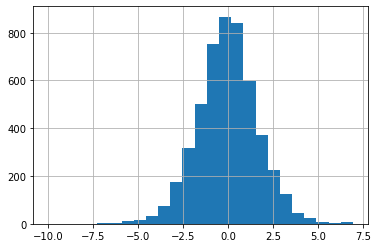

In [12]:
# Comprobation
diff = t - samplet
pd.Series(diff).hist(bins=25)
print(pd.Series(diff).describe())
print("Difference is centered in 0 and errors follow a normal curve")

### Punctual estimation

In [13]:
nterm = [587,470,676,451,436,672,584,697,408]

In [14]:
np.mean(nterm)

553.4444444444445

In [15]:
np.std(nterm,ddof=1)

114.09876326138587

In [16]:
np.std(nterm,ddof=1)/np.sqrt(len(nterm))

38.03292108712862

### Confidence interval for the mean, stdev unknown

In [17]:
nterm = [587,470,676,451,436,672,584,697,408]
n = 9
sigma = 100

In [18]:
scipy.stats.norm.ppf(0.975)

1.959963984540054

In [19]:
np.mean(nterm) + scipy.stats.norm.ppf(0.975)*sigma/np.sqrt(n)

618.7765772624463

In [20]:
np.mean(nterm) + scipy.stats.t.ppf(0.975,8)*np.std(nterm,ddof=1)/np.sqrt(n)

641.1485177387609

In [21]:
scipy.stats.t.cdf(3,8)

0.9914641593831087

### Check that the quotient of two chi-square distributions divided by its degrees of freedom is a F distribution

In [22]:
m=5000 # samples of N(0,1)
n1=5   # degrees of freedom
n2=7 

In [23]:
samplechi2n1 = np.random.chisquare(n1,m)
samplechi2n2 = np.random.chisquare(n2,m)
f = (samplechi2n1 / n1) / (samplechi2n2 / n2)

count    5000.000000
mean        1.403320
std         2.396946
min         0.004532
25%         0.522919
50%         0.949616
75%         1.691653
max       132.512608
dtype: float64

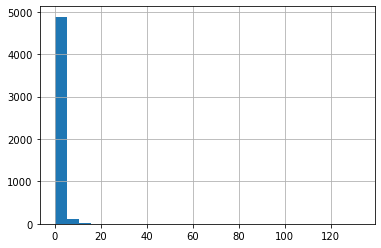

In [24]:
pd.Series(f).hist(bins=25)
pd.Series(f).describe()

count    5000.000000
mean        1.398795
std         1.510839
min         0.013080
25%         0.515053
50%         0.943190
75%         1.709710
max        22.357813
dtype: float64

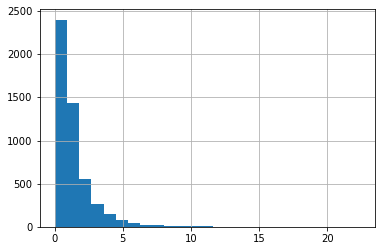

In [25]:
samplef = np.random.f(n1, n2, m)
pd.Series(samplef).hist(bins=25)
pd.Series(samplef).describe()

count    5000.000000
mean        0.004525
std         2.833933
min       -21.277024
25%        -0.756384
50%        -0.005576
75%         0.749306
max       131.768880
dtype: float64
Difference is centered in 0 and errors follow a normal curve


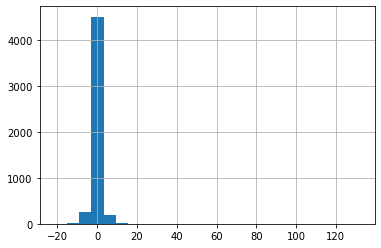

In [26]:
# Comprobation
diff = f - samplef
pd.Series(diff).hist(bins=25)
print(pd.Series(diff).describe())
print("Difference is centered in 0 and errors follow a normal curve")

In [27]:
scipy.stats.f.ppf(0.99,10,5)

10.05101721957127

In [28]:
1-scipy.stats.f.cdf(10.05,10,5)

0.01000227680994581

In [29]:
scipy.stats.t.cdf(2.58,148)

0.9945733337151855